In [2]:
import numpy as np
import sep

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.colors as colors

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [4]:
# read image into standard 2D array
data = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")

In [5]:
print("Min: ", np.min(data))
print("Max: ", np.max(data))
print("Mean: ", np.mean(data))
print("Stdev: ", np.std(data))

Min:  -0.009378761
Max:  56.835293
Mean:  0.0009222782
Stdev:  0.046207033


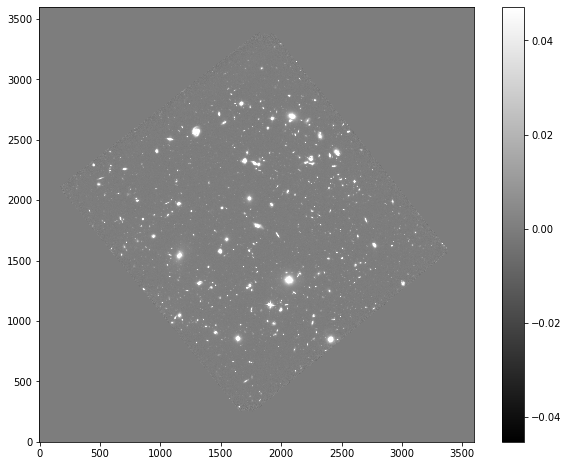

In [6]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig('stars')

In [7]:
# change byte order of array
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

In [8]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0004939954960718751


In [9]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

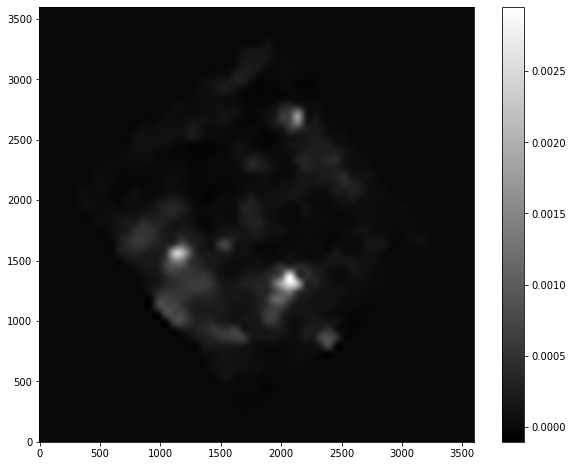

In [10]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('bkg_image1')

In [11]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

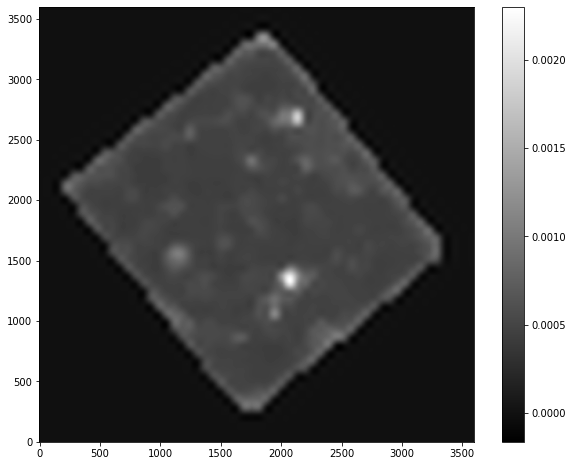

In [12]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('bkg_noise')

In [13]:
# subtract the background
data_sub = data - bkg

In [14]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [15]:
# how many objects were detected
len(objects)

7642

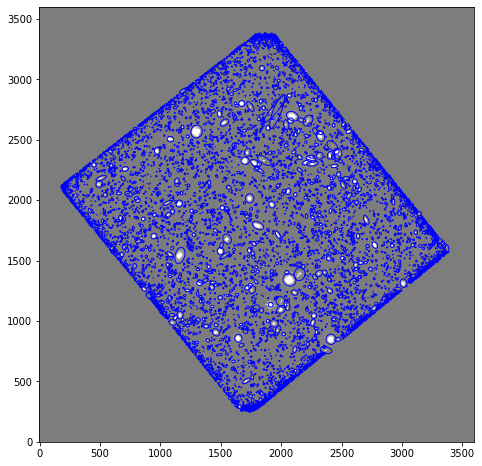

In [16]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('blue')
    ax.add_artist(e)

In [17]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [18]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [19]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.016474 +/- 0.128376
object 1: flux = 0.018756 +/- 0.136979
object 2: flux = -0.002026 +/- 0.002623
object 3: flux = 0.021292 +/- 0.145940
object 4: flux = 0.018956 +/- 0.137706
object 5: flux = 0.008721 +/- 0.093422
object 6: flux = 0.014634 +/- 0.121000
object 7: flux = 0.046033 +/- 0.214570
object 8: flux = 0.015850 +/- 0.125923
object 9: flux = -0.019229 +/- 0.002623


Text(0.5, 1.0, 'Flux Graph')

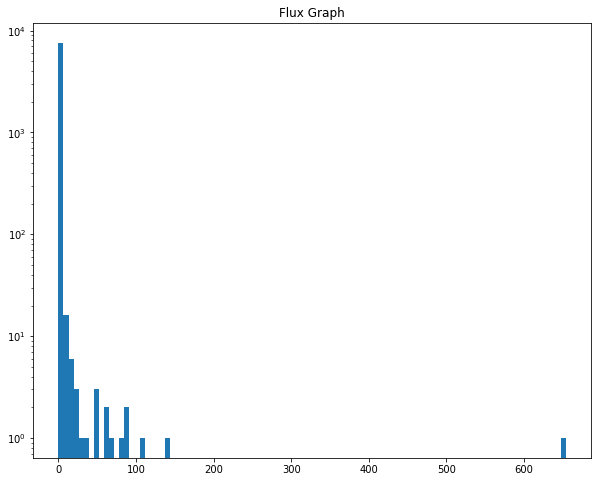

In [25]:
plt.hist(flux, bins=100) #plotting flux histogram
plt.yscale('log') #setting to a log scale
plt.title('Flux Graph') #creating the title